In [3]:
import psycopg2
import pandas as pd
import numpy as np
import re
import sys
from datetime import datetime, timedelta
from dateutil import parser
import itertools
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [4]:
df=pd.read_csv("data with Anmoly_15.06.2023.csv")

In [5]:
df

,Unnamed: 0,customer_zip_code_prefix,customer_city,customer_state,no_of_orders,purchased_approved,delivered_estimated,purchased_delivered,no_of_products,price,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_installments,payment_value,review_score,type,Anomaly_Score
0,0,14960,novo horizonte,SP,1,812.00,5.0,9.00,1,144.00,...,468,23,18,19,credit_card,1,157.45,NaN,Normal,-0.035129
1,1,63700,crateus,CE,1,672.00,20.0,9.00,1,99.99,...,1200,42,25,15,credit_card,8,127.23,NaN,Normal,-0.012103
2,2,85400,guaraniacu,PR,1,42890.00,15.0,11.00,1,22.99,...,598,38,30,38,boleto,1,35.75,5.0,Normal,-0.019696
3,3,91510,porto alegre,RS,4,548.25,24.0,13.25,3,67.60,...,1000,160,16,120,credit_card,1,131.80,NaN,AbNormal,0.012777
4,4,12232,sao jose dos campos,SP,1,1915.00,5.0,3.00,1,47.80,...,600,32,10,24,credit_card,1,126.44,NaN,Normal,-0.024299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86229,86229,8542,ferraz de vasconcelos,SP,1,1427.00,12.0,2.00,1,27.90,...,50,17,10,15,credit_card,1,35.77,NaN,Normal,-0.034770
86230,86230,27260,volta redonda,RJ,1,31929.00,-1.0,28.00,1,69.00,...,1644,16,19,16,boleto,1,88.72,NaN,Normal,-0.014633
86231,86231,18065,sorocaba,SP,1,2883.00,16.0,6.00,1,55.90,...,500,16,8,20,credit_card,6,67.79,NaN,Normal,-0.023207
86232,86232,38407,uberlandia,MG,1,781.00,13.0,16.00,1,31.90,...,250,41,2,29,credit_card,4,44.38,NaN,Normal,-0.018213


In [11]:
df.columns

Index(['Unnamed: 0', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'no_of_orders', 'purchased_approved',
       'delivered_estimated', 'purchased_delivered', 'no_of_products', 'price',
       'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_type',
       'payment_installments', 'payment_value', 'review_score', 'type',
       'Anomaly_Score'],
      dtype='object')

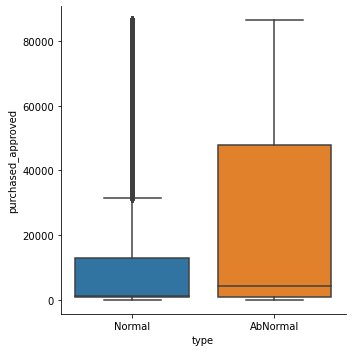

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'type', y = 'purchased_approved', kind = 'box', data = df )

In [7]:
df.groupby(['type'])['purchased_approved'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
AbNormal,4312.0,24253.733154,28788.462142,0.0,867.75,4323.16675,47777.5,86399.0
Normal,81922.0,13373.398231,22931.942334,0.0,753.00,1143.00000,13076.0,86399.0


In [10]:
df.groupby(['type'])['purchased_approved'].median()

type
AbNormal    4323.16675
Normal      1143.00000
Name: purchased_approved, dtype: float64

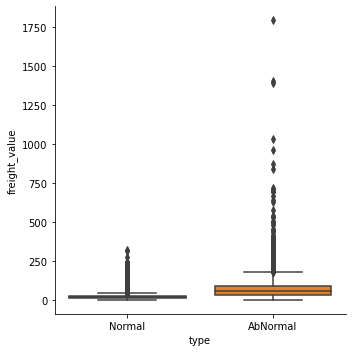

In [12]:
sns.catplot(x = 'type', y = 'freight_value', kind = 'box', data = df )

In [13]:
df.groupby(['type'])['freight_value'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
AbNormal,4312.0,76.349624,83.577258,0.0,31.9675,54.37,91.72,1794.96
Normal,81922.0,21.905646,15.521990,0.0,13.9200,17.30,24.78,321.46


In [14]:
df.groupby(['type'])['freight_value'].median()

type
AbNormal    54.37
Normal      17.30
Name: freight_value, dtype: float64

In [16]:
df.groupby(['Duration groups'])['HbA1c Difference'].describe()

,count,mean,std,min,25%,50%,75%,max
Duration groups,,,,,,,,
<=5 years,859.0,1.20163,0.832357,0.0,0.7,1.0,1.5,6.0
>5 years,763.0,1.37287,1.094911,0.0,0.7,1.0,1.6,8.0


In [17]:
df.groupby(['Duration groups'])['HbA1c Difference'].median()

Duration groups
<=5 years    1.0
>5 years     1.0
Name: HbA1c Difference, dtype: float64

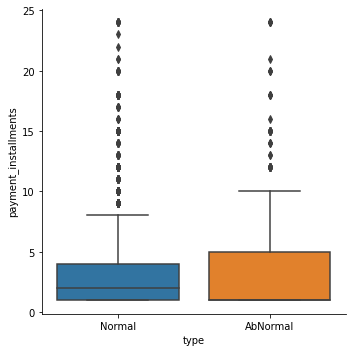

In [16]:
sns.catplot(x = 'type', y = 'payment_installments', kind = 'box', data = df )

# Bi Variate

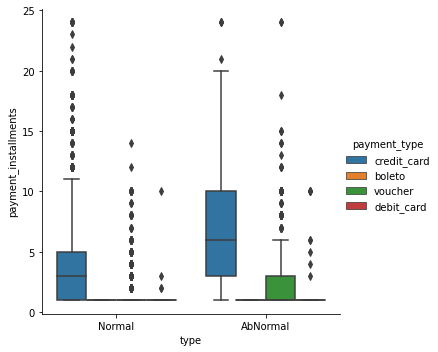

In [18]:
sns.catplot(x = 'type', y = 'payment_installments',  kind = 'box', data = df, hue = 'payment_type')


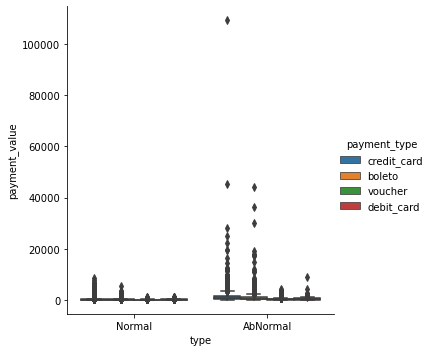

In [19]:
sns.catplot(x = 'type', y = 'payment_value',  kind = 'box', data = df, hue = 'payment_type')


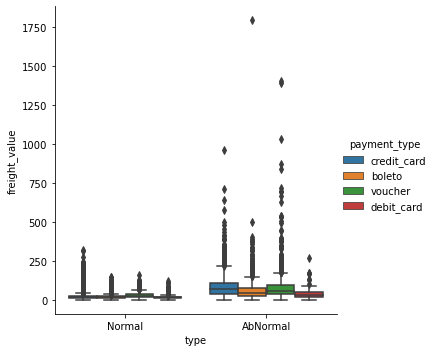

In [20]:
sns.catplot(x = 'type', y = 'freight_value',  kind = 'box', data = df, hue = 'payment_type')
